In [41]:
import numpy as np
import tensorflow as tf

from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import GRU, Flatten, Dropout, Dense, BatchNormalization, Activation
from keras import optimizers
from keras import metrics

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Define model architecture
model = Sequential()
model.add(GRU(30, return_sequences=True, input_shape=(24,22)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(40, activation = "sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))
model.add(BatchNormalization())
model.add((Activation('sigmoid')))

# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=[metrics.AUC()])

# Print model summary
print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 24, 30)            4770      
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                28840     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
__________________________

In [3]:
# load the data
_data = np.load('res/data.npy', allow_pickle=True).tolist()
X_train = _data['X_train']
y_train = _data['y_train']
X_val = _data['X_val']
y_val = _data['y_val']
X_test = _data['X_test']
y_test = _data['y_test']
print("Loaded!")

Loaded!


In [4]:
# Print information about the created arrays
print("No. of patients: {}".format(len(y_train)+len(y_val)+len(y_test)))
print("No. of patients in train, val, test sets: {}, {}, {}".format(len(X_train), len(X_val), len(X_test)))
print("No. of patients who died in hospital in train, val, test sets: {}, {}, {}".format(str(sum(y_train)), str(sum(y_val)), str(sum(y_test))))
print("Proportion of patients who died in hospital in train, val, test sets: {}%, {}%, {}%".format(round(sum(y_train)/len(y_train)*100,3), round(sum(y_val)/len(y_val)*100,3), round(sum(y_test)/len(y_test)*100,3)))

No. of patients: 38549
No. of patients in train, val, test sets: 30839, 3855, 3855
No. of patients who died in hospital in train, val, test sets: 3458.0, 417.0, 445.0
Proportion of patients who died in hospital in train, val, test sets: 11.213%, 10.817%, 11.543%


In [5]:
# Check the shapes of the arrays
print("X_train: {}".format(np.shape(X_train)))
print("y_train: {}".format(np.shape(y_train)))
print("X_val: {}".format(np.shape(X_val)))
print("y_val: {}".format(np.shape(y_val)))
print("X_test: {}".format(np.shape(X_test)))
print("y_test: {}".format(np.shape(y_test)))

X_train: (30839, 22, 24)
y_train: (30839,)
X_val: (3855, 22, 24)
y_val: (3855,)
X_test: (3855, 22, 24)
y_test: (3855,)


In [6]:
# Reshape the input tensors so they are in the shape (m,T,n) to fit Keras standards
X_train = np.transpose(X_train, (0,2,1))
X_val = np.transpose(X_val, (0,2,1))
X_test = np.transpose(X_test, (0,2,1))

In [7]:
# Check the shapes of the arrays again
print("X_train: {}".format(np.shape(X_train)))
print("X_val: {}".format(np.shape(X_val)))
print("X_test: {}".format(np.shape(X_test)))

X_train: (30839, 24, 22)
X_val: (3855, 24, 22)
X_test: (3855, 24, 22)


In [8]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=100, verbose=2)


Train on 30839 samples, validate on 3855 samples
Epoch 1/30
 - 4s - loss: 0.6058 - auc_1: 0.8050 - val_loss: 0.5804 - val_auc_1: 0.8409
Epoch 2/30
 - 4s - loss: 0.4971 - auc_1: 0.8466 - val_loss: 0.5726 - val_auc_1: 0.8511
Epoch 3/30
 - 4s - loss: 0.4296 - auc_1: 0.8559 - val_loss: 0.4158 - val_auc_1: 0.8623
Epoch 4/30
 - 4s - loss: 0.3792 - auc_1: 0.8636 - val_loss: 0.6593 - val_auc_1: 0.8494
Epoch 5/30
 - 4s - loss: 0.3411 - auc_1: 0.8721 - val_loss: 0.9067 - val_auc_1: 0.8397
Epoch 6/30
 - 4s - loss: 0.3138 - auc_1: 0.8771 - val_loss: 0.5907 - val_auc_1: 0.8293
Epoch 7/30
 - 4s - loss: 0.2932 - auc_1: 0.8806 - val_loss: 0.4490 - val_auc_1: 0.8732
Epoch 8/30
 - 4s - loss: 0.2755 - auc_1: 0.8862 - val_loss: 0.9022 - val_auc_1: 0.8343
Epoch 9/30
 - 4s - loss: 0.2633 - auc_1: 0.8908 - val_loss: 1.0167 - val_auc_1: 0.8348
Epoch 10/30
 - 4s - loss: 0.2529 - auc_1: 0.8953 - val_loss: 0.4699 - val_auc_1: 0.8611
Epoch 11/30
 - 4s - loss: 0.2458 - auc_1: 0.8960 - val_loss: 0.5256 - val_auc_1

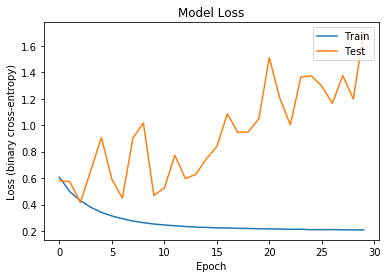

In [9]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss (binary cross-entropy)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

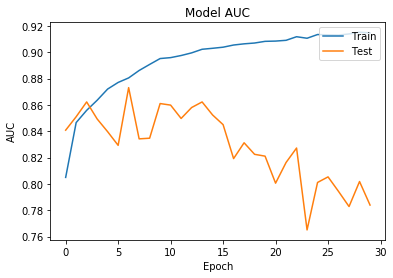

In [10]:
# Plot the AUC
plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [87]:
# Calculate TPR and FPR on the test set for plotting the ROC curve
from sklearn.metrics import roc_curve
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [88]:
# Calculate the AUROC for the test set
from sklearn.metrics import auc
auc = auc(fpr, tpr)

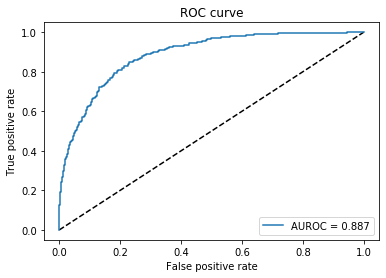

In [92]:
# Plot the ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUROC = {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [93]:
# Make predictions using a decision threshold judged from the above plot
y_pred_binary = y_pred[:]>0.2

In [94]:
# Write a function that plots nice confusion matrices
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm[0][0] = round(cm[0][0],2)
        cm[0][1] = round(cm[0][1],2)
        cm[1][0] = round(cm[1][0],2)
        cm[1][1] = round(cm[1][1],2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix


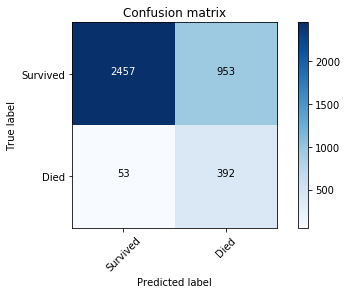

In [96]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plot_confusion_matrix(cm, ['Survived', 'Died'], normalize=False)

In [44]:
# Print a classification report
print(classification_report(y_test, y_pred_binary, target_names=['Survived', 'Died']))

              precision    recall  f1-score   support

    Survived       0.97      0.81      0.88      3410
        Died       0.35      0.80      0.49       445

    accuracy                           0.81      3855
   macro avg       0.66      0.81      0.69      3855
weighted avg       0.90      0.81      0.84      3855

